# 津南数字制造算法挑战赛

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train_data_time.csv')
df_testA = pd.read_csv('../data/jinnan_round1_testA_20181227.csv')

In [3]:
df_train.columns

Index(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13',
       'B14', '收率'],
      dtype='object')

In [5]:
df_testA.columns

Index(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13',
       'B14'],
      dtype='object')

## 特征基本信息

In [29]:
## 训练集
df_train['A1'].describe()

count    1396.000000
mean      298.853868
std        10.130552
min       200.000000
25%       300.000000
50%       300.000000
75%       300.000000
max       300.000000
Name: A1, dtype: float64

In [77]:
dict(df_train['A1'].value_counts())

{300: 1377, 200: 13, 250: 6}

In [30]:
df_train['A2'].describe()

count     42.0
mean     125.0
std        0.0
min      125.0
25%      125.0
50%      125.0
75%      125.0
max      125.0
Name: A2, dtype: float64

In [78]:
dict(df_train['A2'].value_counts())

{125.0: 42}

In [31]:
df_train['A3'].describe()

count    1354.000000
mean      403.515510
std        13.348093
min       270.000000
25%       405.000000
50%       405.000000
75%       405.000000
max       405.000000
Name: A3, dtype: float64

In [79]:
dict(df_train['A3'].value_counts())

{405.0: 1336, 270.0: 12, 340.0: 6}

In [32]:
df_train['A4'].describe()

count    1396.000000
mean      705.974212
std        53.214754
min       470.000000
25%       700.000000
50%       700.000000
75%       700.000000
max       980.000000
Name: A4, dtype: float64

In [80]:
dict(df_train['A4'].value_counts())

{700: 1336, 980: 42, 470: 12, 590: 6}

In [33]:
df_train['A5'].describe()

count        1396
unique         67
top       6:00:00
freq          269
Name: A5, dtype: object

In [81]:
dict(df_train['A5'].value_counts())

{'6:00:00': 269,
 '14:00:00': 260,
 '22:00:00': 169,
 '21:00:00': 89,
 '8:00:00': 39,
 '1:00:00': 38,
 '18:00:00': 37,
 '2:00:00': 24,
 '17:00:00': 23,
 '12:30:00': 22,
 '11:00:00': 22,
 '15:00:00': 22,
 '12:00:00': 21,
 '7:00:00': 19,
 '4:00:00': 17,
 '23:00:00': 16,
 '5:00:00': 16,
 '21:30:00': 16,
 '9:00:00': 15,
 '10:00:00': 15,
 '0:00:00': 15,
 '19:00:00': 14,
 '6:30:00': 14,
 '13:00:00': 14,
 '3:30:00': 13,
 '16:00:00': 13,
 '15:30:00': 13,
 '20:00:00': 12,
 '3:00:00': 11,
 '17:30:00': 9,
 '10:30:00': 9,
 '7:30:00': 8,
 '14:30:00': 8,
 '2:30:00': 7,
 '16:30:00': 7,
 '13:30:00': 7,
 '22:30:00': 6,
 '8:30:00': 6,
 '1:30:00': 6,
 '4:30:00': 6,
 '20:30:00': 6,
 '5:30:00': 5,
 '19:30:00': 4,
 '11:30:00': 3,
 '18:30:00': 3,
 '9:30:00': 3,
 '15:40:00': 2,
 '1900/1/21 0:00': 2,
 '23:30:00': 2,
 '13:50:00': 2,
 '7:45:00': 1,
 '9:40:00': 1,
 '11:20:00': 1,
 '11:45:00': 1,
 '3:45:00': 1,
 '1900/1/29 0:00': 1,
 '15:10:00': 1,
 '10:40:00': 1,
 '10:45:00': 1,
 '8:15:00': 1,
 '6:50:00': 1,
 '16

In [34]:
df_train['A6'].describe()

count    1396.000000
mean       28.287751
std         6.742765
min        17.000000
25%        24.000000
50%        29.000000
75%        30.000000
max        97.000000
Name: A6, dtype: float64

In [82]:
dict(df_train['A6'].value_counts())

{29.0: 493,
 30.0: 198,
 21.0: 197,
 24.0: 63,
 27.0: 58,
 38.0: 57,
 28.0: 50,
 22.0: 37,
 23.0: 29,
 20.0: 25,
 39.0: 23,
 18.0: 21,
 26.0: 19,
 37.0: 16,
 35.0: 13,
 34.0: 13,
 25.0: 12,
 40.0: 11,
 19.0: 9,
 36.0: 9,
 41.0: 7,
 80.0: 6,
 33.0: 6,
 31.0: 4,
 32.0: 3,
 17.0: 3,
 50.0: 2,
 65.0: 1,
 70.0: 1,
 22.7: 1,
 44.0: 1,
 60.0: 1,
 42.0: 1,
 43.0: 1,
 47.0: 1,
 48.0: 1,
 51.0: 1,
 72.0: 1,
 97.0: 1}

In [35]:
df_train['A7'].describe()

count          149
unique          75
top       12:40:00
freq            13
Name: A7, dtype: object

In [83]:
dict(df_train['A7'].value_counts())

{'12:40:00': 13,
 '15:40:00': 7,
 '7:00:00': 5,
 '2:10:00': 5,
 '7:10:00': 4,
 '21:40:00': 4,
 '2:30:00': 4,
 '2:45:00': 3,
 '12:30:00': 3,
 '17:30:00': 3,
 '21:45:00': 3,
 '12:15:00': 3,
 '17:10:00': 3,
 '19:40:00': 3,
 '7:40:00': 3,
 '15:20:00': 3,
 '6:15:00': 3,
 '9:30:00': 2,
 '22:00:00': 2,
 '7:45:00': 2,
 '2:40:00': 2,
 '13:00:00': 2,
 '4:30:00': 2,
 '23:30:00': 2,
 '21:20:00': 2,
 '16:00:00': 2,
 '21:15:00': 2,
 '3:00:00': 2,
 '22:30:00': 2,
 '12:45:00': 2,
 '4:20:00': 2,
 '6:20:00': 2,
 '15:10:00': 2,
 '13:40:00': 2,
 '20:40:00': 2,
 '15:45:00': 2,
 '16:20:00': 1,
 '15:15:00': 1,
 '13:10:00': 1,
 '22:40:00': 1,
 '3:30:00': 1,
 '6:25:00': 1,
 '14:15:00': 1,
 '7:30:00': 1,
 '21:10:00': 1,
 '6:30:00': 1,
 '18:10:00': 1,
 '15:00:00': 1,
 '1:30:00': 1,
 '11:45:00': 1,
 '20:15:00': 1,
 '5:15:00': 1,
 '8:40:00': 1,
 '6:40:00': 1,
 '9:00:00': 1,
 '8:10:00': 1,
 '13:45:00': 1,
 '21:30:00': 1,
 '5:30:00': 1,
 '1:10:00': 1,
 '2:20:00': 1,
 '12:00:00': 1,
 '1:00:00': 1,
 '17:15:00': 1,
 '2

In [36]:
df_train['A8'].describe()

count    149.000000
mean      78.818792
std        2.683920
min       70.000000
25%       80.000000
50%       80.000000
75%       80.000000
max       82.000000
Name: A8, dtype: float64

In [37]:
df_train['A9'].describe()

count        1396
unique         95
top       8:00:00
freq          252
Name: A9, dtype: object

In [84]:
dict(df_train['A9'].value_counts())

{'8:00:00': 252,
 '16:00:00': 248,
 '0:00:00': 150,
 '23:00:00': 92,
 '3:00:00': 32,
 '23:30:00': 26,
 '19:00:00': 26,
 '20:00:00': 26,
 '10:00:00': 24,
 '11:00:00': 22,
 '15:00:00': 22,
 '5:00:00': 18,
 '2:30:00': 17,
 '7:00:00': 17,
 '15:30:00': 17,
 '14:00:00': 17,
 '12:30:00': 16,
 '7:30:00': 16,
 '4:00:00': 15,
 '17:00:00': 15,
 '13:30:00': 14,
 '22:30:00': 14,
 '9:00:00': 14,
 '17:30:00': 13,
 '14:30:00': 13,
 '6:00:00': 13,
 '18:00:00': 11,
 '16:30:00': 11,
 '9:30:00': 11,
 '18:30:00': 11,
 '11:30:00': 10,
 '6:30:00': 10,
 '22:00:00': 10,
 '1:30:00': 10,
 '13:00:00': 9,
 '8:30:00': 9,
 '3:30:00': 9,
 '21:00:00': 9,
 '0:30:00': 8,
 '12:00:00': 8,
 '4:30:00': 8,
 '10:30:00': 7,
 '5:30:00': 7,
 '19:30:00': 6,
 '1:00:00': 6,
 '2:00:00': 5,
 '20:30:00': 5,
 '8:20:00': 4,
 '21:30:00': 4,
 '18:40:00': 3,
 '8:15:00': 3,
 '9:20:00': 2,
 '5:45:00': 2,
 '17:15:00': 2,
 '23:20:00': 2,
 '7:40:00': 2,
 '8:50:00': 2,
 '14:20:00': 2,
 '9:40:00': 2,
 '14:40:00': 2,
 '3:10:00': 1,
 '13:40:00': 1,

In [38]:
df_train['A10'].describe()

count    1396.000000
mean      100.861032
std         0.905198
min       100.000000
25%       100.000000
50%       101.000000
75%       102.000000
max       103.000000
Name: A10, dtype: float64

In [39]:
df_train['A11'].describe()

count        1396
unique         94
top       9:00:00
freq          251
Name: A11, dtype: object

In [85]:
dict(df_train['A11'].value_counts())

{'9:00:00': 251,
 '17:00:00': 247,
 '1:00:00': 153,
 '0:00:00': 92,
 '4:00:00': 31,
 '20:00:00': 26,
 '21:00:00': 26,
 '11:00:00': 24,
 '0:30:00': 22,
 '16:00:00': 22,
 '12:00:00': 21,
 '8:00:00': 19,
 '6:00:00': 18,
 '15:00:00': 17,
 '13:30:00': 17,
 '16:30:00': 17,
 '3:30:00': 17,
 '8:30:00': 16,
 '23:30:00': 15,
 '5:00:00': 14,
 '18:00:00': 14,
 '14:30:00': 14,
 '7:00:00': 13,
 '17:30:00': 13,
 '18:30:00': 13,
 '19:00:00': 12,
 '15:30:00': 12,
 '7:30:00': 12,
 '10:00:00': 12,
 '12:30:00': 11,
 '10:30:00': 11,
 '19:30:00': 11,
 '23:00:00': 10,
 '2:30:00': 10,
 '9:30:00': 10,
 '13:00:00': 9,
 '4:30:00': 9,
 '22:00:00': 9,
 '1:30:00': 8,
 '5:30:00': 8,
 '14:00:00': 8,
 '6:30:00': 7,
 '11:30:00': 7,
 '2:00:00': 6,
 '20:30:00': 6,
 '9:20:00': 5,
 '3:00:00': 5,
 '22:30:00': 4,
 '21:30:00': 4,
 '9:15:00': 3,
 '19:40:00': 3,
 '9:50:00': 2,
 '15:20:00': 2,
 '6:45:00': 2,
 '10:40:00': 2,
 '15:40:00': 2,
 '0:20:00': 2,
 '10:20:00': 2,
 '8:40:00': 2,
 '18:15:00': 2,
 '5:40:00': 1,
 '5:15:00': 1

In [40]:
df_train['A12'].describe()

count    1396.000000
mean      102.641834
std         0.915387
min        98.000000
25%       102.000000
50%       103.000000
75%       103.000000
max       107.000000
Name: A12, dtype: float64

In [41]:
df_train['A13'].describe()

count    1396.000000
mean        0.199907
std         0.002524
min         0.120000
25%         0.200000
50%         0.200000
75%         0.200000
max         0.200000
Name: A13, dtype: float64

In [43]:
df_train['A14'].describe()

count         1396
unique          92
top       10:00:00
freq           251
Name: A14, dtype: object

In [44]:
df_train['A15'].describe()

count    1396.000000
mean      103.829370
std         0.963639
min       100.000000
25%       103.000000
50%       104.000000
75%       104.000000
max       109.000000
Name: A15, dtype: float64

In [45]:
df_train['A16'].describe()

count         1396
unique          94
top       11:00:00
freq           250
Name: A16, dtype: object

In [46]:
df_train['A17'].describe()

count    1396.000000
mean      104.766905
std         1.401446
min        89.000000
25%       104.000000
50%       105.000000
75%       105.000000
max       108.000000
Name: A17, dtype: float64

In [47]:
df_train['A18'].describe()

count    1396.000000
mean        0.199928
std         0.002676
min         0.100000
25%         0.200000
50%         0.200000
75%         0.200000
max         0.200000
Name: A18, dtype: float64

In [48]:
df_train['A19'].describe()

count    1396.000000
mean      231.067335
std        50.478071
min       100.000000
25%       200.000000
50%       200.000000
75%       300.000000
max       350.000000
Name: A19, dtype: float64

In [49]:
df_train['A20'].describe()

count            1396
unique            159
top       11:00-12:00
freq              239
Name: A20, dtype: object

In [50]:
df_train['A21'].describe()

count    1393.000000
mean       48.707825
std         4.976531
min        20.000000
25%        50.000000
50%        50.000000
75%        50.000000
max        90.000000
Name: A21, dtype: float64

In [51]:
df_train['A22'].describe()

count    1396.000000
mean        9.117120
std         0.369152
min         3.500000
25%         9.000000
50%         9.000000
75%         9.000000
max        10.000000
Name: A22, dtype: float64

In [52]:
df_train['A23'].describe()

count    1393.000000
mean        5.002872
std         0.136638
min         4.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: A23, dtype: float64

In [53]:
df_train['A24'].describe()

count         1395
unique          91
top       12:00:00
freq           258
Name: A24, dtype: object

In [54]:
df_train['A25'].describe()

count     1396
unique      15
top         80
freq       542
Name: A25, dtype: object

In [55]:
df_train['A26'].describe()

count         1394
unique          88
top       13:00:00
freq           265
Name: A26, dtype: object

In [56]:
df_train['A27'].describe()

count    1396.000000
mean       74.396848
std         3.044490
min        45.000000
25%        73.000000
50%        73.000000
75%        77.000000
max        80.000000
Name: A27, dtype: float64

In [57]:
df_train['A28'].describe()

count            1396
unique            157
top       13:00-14:00
freq              243
Name: A28, dtype: object

In [59]:
df_train['B1'].describe()

count    1386.000000
mean      334.452742
std       105.120753
min         3.500000
25%       320.000000
50%       320.000000
75%       330.000000
max      1200.000000
Name: B1, dtype: float64

In [60]:
df_train['B2'].describe()

count    1394.000000
mean        3.454412
std         0.388585
min         0.150000
25%         3.500000
50%         3.500000
75%         3.500000
max         3.600000
Name: B2, dtype: float64

In [61]:
df_train['B3'].describe()

count    1394.000000
mean        3.500072
std         0.002678
min         3.500000
25%         3.500000
50%         3.500000
75%         3.500000
max         3.600000
Name: B3, dtype: float64

In [62]:
df_train['B4'].describe()

count            1396
unique            178
top       14:00-15:00
freq              240
Name: B4, dtype: object

In [63]:
df_train['B5'].describe()

count         1395
unique          60
top       15:00:00
freq           245
Name: B5, dtype: object

In [64]:
df_train['B6'].describe()

count    1396.000000
mean       72.065186
std         9.161986
min        40.000000
25%        65.000000
50%        78.000000
75%        80.000000
max        80.000000
Name: B6, dtype: float64

In [65]:
df_train['B7'].describe()

count         1396
unique          58
top       17:00:00
freq           263
Name: B7, dtype: object

In [66]:
df_train['B8'].describe()

count    1395.000000
mean       43.709677
std         4.338396
min        20.000000
25%        45.000000
50%        45.000000
75%        45.000000
max        73.000000
Name: B8, dtype: float64

In [67]:
df_train['B9'].describe()

count            1396
unique            178
top       17:00-18:30
freq              189
Name: B9, dtype: object

In [68]:
df_train['B10'].describe()

count            1152
unique            180
top       10:30-12:00
freq              166
Name: B10, dtype: object

In [69]:
df_train['B11'].describe()

count             547
unique             37
top       20:00-21:00
freq              154
Name: B11, dtype: object

In [70]:
df_train['B12'].describe()

count    1395.000000
mean     1020.215054
std       205.920155
min       400.000000
25%       800.000000
50%      1200.000000
75%      1200.000000
max      1200.000000
Name: B12, dtype: float64

In [71]:
df_train['B13'].describe()

count    1395.000000
mean        0.149419
std         0.008213
min         0.030000
25%         0.150000
50%         0.150000
75%         0.150000
max         0.150000
Name: B13, dtype: float64

In [72]:
df_train['B14'].describe()

count    1396.000000
mean      410.403295
std        26.018410
min        40.000000
25%       400.000000
50%       400.000000
75%       420.000000
max       460.000000
Name: B14, dtype: float64

In [74]:
df_train['收率'].describe()

count    1396.000000
mean        0.923244
std         0.030880
min         0.624000
25%         0.902000
50%         0.925000
75%         0.943000
max         1.000800
Name: 收率, dtype: float64

In [89]:
df_train.iloc[:,0:17].describe()

,A1,A2,A3,A4,A6,A8,A10,A12,A13,A15
count,1396.000000,42.0,1354.000000,1396.000000,1396.000000,149.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,298.853868,125.0,403.515510,705.974212,28.287751,78.818792,100.861032,102.641834,0.199907,103.829370
std,10.130552,0.0,13.348093,53.214754,6.742765,2.683920,0.905198,0.915387,0.002524,0.963639
min,200.000000,125.0,270.000000,470.000000,17.000000,70.000000,100.000000,98.000000,0.120000,100.000000
25%,300.000000,125.0,405.000000,700.000000,24.000000,80.000000,100.000000,102.000000,0.200000,103.000000
50%,300.000000,125.0,405.000000,700.000000,29.000000,80.000000,101.000000,103.000000,0.200000,104.000000
75%,300.000000,125.0,405.000000,700.000000,30.000000,80.000000,102.000000,103.000000,0.200000,104.000000
max,300.000000,125.0,405.000000,980.000000,97.000000,82.000000,103.000000,107.000000,0.200000,109.000000


In [94]:
df_train.iloc[:,17:34].describe()

,A17,A18,A19,A21,A22,A23,A27,B1,B2,B3
count,1396.000000,1396.000000,1396.000000,1393.000000,1396.000000,1393.000000,1396.000000,1386.000000,1394.000000,1394.000000
mean,104.766905,0.199928,231.067335,48.707825,9.117120,5.002872,74.396848,334.452742,3.454412,3.500072
std,1.401446,0.002676,50.478071,4.976531,0.369152,0.136638,3.044490,105.120753,0.388585,0.002678
min,89.000000,0.100000,100.000000,20.000000,3.500000,4.000000,45.000000,3.500000,0.150000,3.500000
25%,104.000000,0.200000,200.000000,50.000000,9.000000,5.000000,73.000000,320.000000,3.500000,3.500000
50%,105.000000,0.200000,200.000000,50.000000,9.000000,5.000000,73.000000,320.000000,3.500000,3.500000
75%,105.000000,0.200000,300.000000,50.000000,9.000000,5.000000,77.000000,330.000000,3.500000,3.500000
max,108.000000,0.200000,350.000000,90.000000,10.000000,10.000000,80.000000,1200.000000,3.600000,3.600000


In [93]:
df_train.iloc[:,34:45].describe()

,B6,B8,B12,B13,B14,收率
count,1396.000000,1395.000000,1395.000000,1395.000000,1396.000000,1396.000000
mean,72.065186,43.709677,1020.215054,0.149419,410.403295,0.923244
std,9.161986,4.338396,205.920155,0.008213,26.018410,0.030880
min,40.000000,20.000000,400.000000,0.030000,40.000000,0.624000
25%,65.000000,45.000000,800.000000,0.150000,400.000000,0.902000
50%,78.000000,45.000000,1200.000000,0.150000,400.000000,0.925000
75%,80.000000,45.000000,1200.000000,0.150000,420.000000,0.943000
max,80.000000,73.000000,1200.000000,0.150000,460.000000,1.000800


## 相关性分析

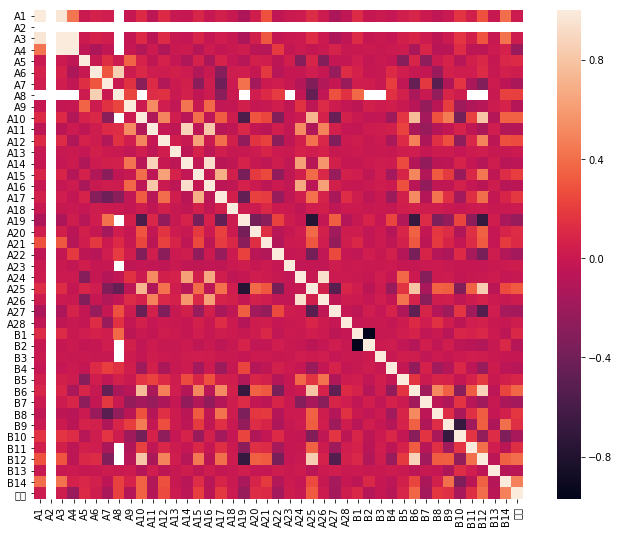

In [4]:
## 相关性矩阵
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

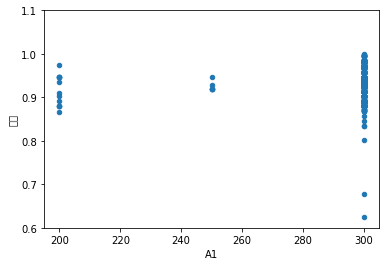

In [97]:
data = pd.concat([df_train['收率'], df_train['A1']], axis = 1)
data.plot.scatter(x = 'A1', y = '收率', ylim = (0.6,1.1))

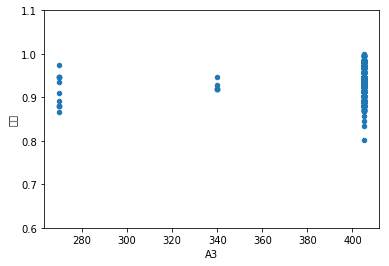

In [101]:
data = pd.concat([df_train['收率'], df_train['A3']], axis = 1)
data.plot.scatter(x = 'A3', y = '收率', ylim = (0.6,1.1))

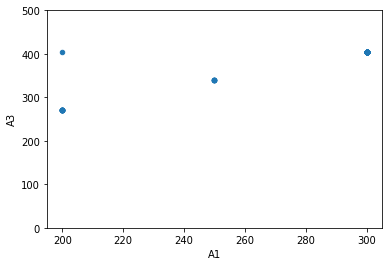

In [102]:
data = pd.concat([df_train['A3'], df_train['A1']], axis = 1)
data.plot.scatter(x = 'A1', y = 'A3', ylim = (0, 500))

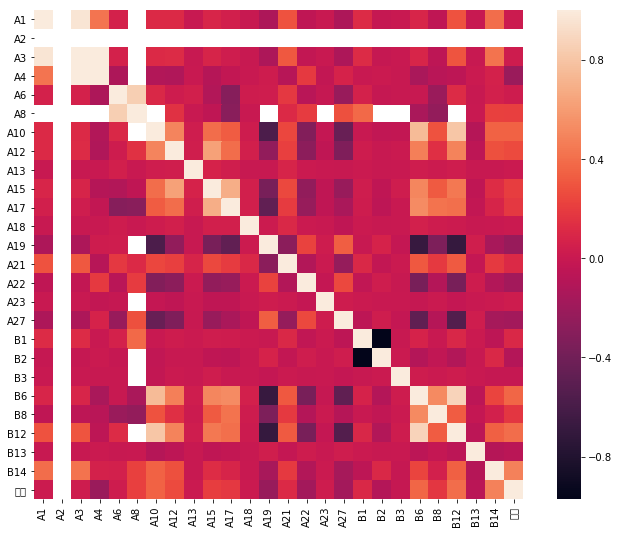

## 处理后v1版本数据分析

In [12]:
df_train = pd.read_csv('../data/train_data_v1.csv')

In [13]:
df_train.iloc[:,18:34].describe()

,B1,B2,B3,B6,B8,B12,B13,B14,收率,A7-A5,A9-A7,A11-A9,A14-A11,A16-A14,A20s-A16,A20e-A20s
count,1386.000000,1394.000000,1394.000000,1396.000000,1395.000000,1395.000000,1395.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,334.452742,3.454412,3.500072,72.065186,43.709677,1020.215054,0.149419,410.403295,0.923244,10.203489,10.322777,1.110435,1.061844,1.021848,0.935468,0.816320
std,105.120753,0.388585,0.002678,9.161986,4.338396,205.920155,0.008213,26.018410,0.030880,7.157915,7.300943,1.361930,0.991158,0.511570,2.516743,0.591544
min,3.500000,0.150000,3.500000,40.000000,20.000000,400.000000,0.030000,40.000000,0.624000,0.000000,0.000000,0.000000,0.833333,0.500000,0.000000,0.000000
25%,320.000000,3.500000,3.500000,65.000000,45.000000,800.000000,0.150000,400.000000,0.902000,2.999722,3.000278,1.000000,1.000000,1.000000,0.000000,0.500000
50%,320.000000,3.500000,3.500000,78.000000,45.000000,1200.000000,0.150000,400.000000,0.925000,9.999722,8.000278,1.000000,1.000000,1.000000,0.000000,1.000000
75%,330.000000,3.500000,3.500000,80.000000,45.000000,1200.000000,0.150000,420.000000,0.943000,17.999722,16.000278,1.000000,1.000000,1.000000,0.500000,1.000000
max,1200.000000,3.600000,3.600000,80.000000,73.000000,1200.000000,0.150000,460.000000,1.000800,23.999722,23.500278,23.000000,21.000000,15.000000,23.500000,20.500000


In [14]:
df_train.iloc[:,35:40].describe()

,A26-A24,A28s-A26,A28e-A28s,B4s-A28e,B4e-B4s
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,0.815317,2.316488,0.957259,0.599150,1.164064
std,0.700966,3.764691,0.640639,2.983737,0.675425
min,0.000000,0.000000,0.333333,0.000000,0.000000
25%,0.500000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,5.500000,1.000000,0.000000,1.000000
max,20.500000,23.666667,22.500000,23.999722,23.000000


In [17]:
stats = []
for col in df_train.columns:
    stats.append((col, df_train[col].nunique(), df_train[col].isnull().sum() * 100 / df_train.shape[0], df_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, df_train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Unique_values', ascending=False)[:]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,样本id,1396,0.000000,0.071633,object
28,A9-A7,87,0.000000,17.979943,float64
46,B11s-B10e,83,0.000000,56.518625,float64
26,收率,73,0.000000,21.848138,float64
4,A5,66,0.000000,19.269341,int64
32,A20s-A16,66,0.000000,64.255014,float64
27,A7-A5,66,0.000000,18.767908,float64
44,B10s-B9e,52,0.000000,40.830946,float64
36,A28s-A26,50,0.000000,66.905444,float64
41,B7-B5,42,0.000000,64.541547,float64


In [19]:
train_data = pd.read_csv('../data/train_data_time.csv')

In [23]:
train_data['A1'].describe()

count    1396.000000
mean      298.853868
std        10.130552
min       200.000000
25%       300.000000
50%       300.000000
75%       300.000000
max       300.000000
Name: A1, dtype: float64

## 特征重要度

In [7]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [14]:
boston = pd.read_csv('../data/train_data_ori.csv')
test = pd.read_csv('../data/testA_data_ori.csv')
test = test.drop(['样本id'],axis=1)
boston = boston.drop(['样本id'],axis=1)
boston = boston.fillna(-1)
cols = [f for f in boston.columns if f != '收率']
X = boston[cols]
Y = boston["收率"]
print(boston.shape)

(1396, 33)


In [6]:
## 随即森林特征重要度计算
rf = RandomForestRegressor()
rf.fit(X, Y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), cols), 
             reverse=True))

Features sorted by their score:
[(0.1381, 'A15'), (0.1323, 'A7'), (0.0554, 'A9'), (0.0545, 'B5'), (0.0533, 'B14'), (0.05, 'B6'), (0.0493, 'B7'), (0.0456, 'A6'), (0.0429, 'A25'), (0.0362, 'A21'), (0.0361, 'B10'), (0.0312, 'A16'), (0.0253, 'A20'), (0.0232, 'A11'), (0.0231, 'A27'), (0.0217, 'A26'), (0.021, 'A17'), (0.0193, 'A28'), (0.019, 'A10'), (0.0183, 'B9'), (0.0175, 'A8'), (0.0142, 'B11'), (0.0135, 'A24'), (0.0118, 'A14'), (0.01, 'A12'), (0.0096, 'B4'), (0.0094, 'B1'), (0.0092, 'A19'), (0.0073, 'B8'), (0.0013, 'A5'), (0.0002, 'A22'), (0.0001, 'B12')]


In [10]:
data_all = pd.concat([boston, test], axis=0, ignore_index=True)

In [11]:
data_all.head()

,A10,A11,A12,A14,A15,A16,A17,A19,A20,A21,...,B11,B12,B14,B4,B5,B6,B7,B8,B9,收率
0,100.0,16.5,102.0,17.5,103.0,18.5,104.0,300.0,0.5,50.0,...,-1.0,800.0,400.0,1.0,8.0,65.0,11.5,45.0,1.5,0.879
1,101.0,17.0,103.0,18.0,104.0,19.0,105.0,200.0,1.0,50.0,...,1.0,1200.0,400.0,1.0,23.0,80.0,6.0,45.0,1.5,0.902
2,102.0,17.0,103.0,18.0,104.0,19.0,105.0,200.0,0.5,50.0,...,1.0,1200.0,400.0,1.0,23.0,80.0,1.0,45.0,1.5,0.936
3,100.0,4.0,102.0,5.0,103.0,6.0,104.0,200.0,0.5,50.0,...,-1.0,800.0,400.0,1.0,15.5,65.0,18.0,45.0,1.5,0.902
4,101.0,1.0,103.0,2.0,104.0,3.0,105.0,200.0,1.0,50.0,...,1.0,1200.0,420.0,1.0,7.0,80.0,9.0,45.0,1.5,0.983


In [12]:
data_all.tail()

,A10,A11,A12,A14,A15,A16,A17,A19,A20,A21,...,B11,B12,B14,B4,B5,B6,B7,B8,B9,收率
1541,100.0,13.5,101.0,14.5,103.0,15.5,103.0,300.0,0.5,50.0,...,-1.0,800.0,440.0,1.5,8.0,65.0,10.5,45.0,1.5,NaN
1542,102.0,0.0,104.0,1.0,105.0,2.0,106.0,200.0,1.0,50.0,...,-1.0,1200.0,440.0,1.0,6.0,80.0,8.0,45.0,4.0,NaN
1543,100.0,10.0,103.0,11.0,102.0,12.0,102.0,300.0,0.5,50.0,...,-1.0,800.0,440.0,1.5,1.5,40.0,4.5,20.0,1.5,NaN
1544,100.0,4.5,102.0,5.5,102.0,6.5,102.0,300.0,0.5,50.0,...,-1.0,800.0,420.0,2.0,13.5,65.0,17.0,45.0,1.5,NaN
1545,100.0,0.5,101.0,1.5,103.0,2.5,105.0,300.0,1.0,50.0,...,-1.0,800.0,420.0,1.5,11.0,65.0,14.0,50.0,1.5,NaN


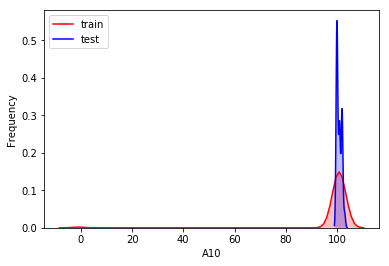

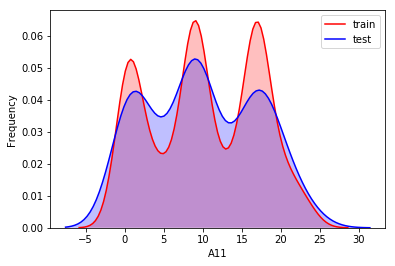

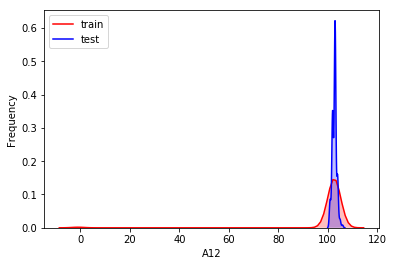

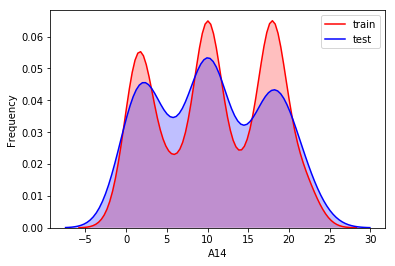

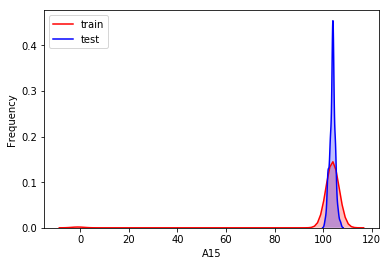

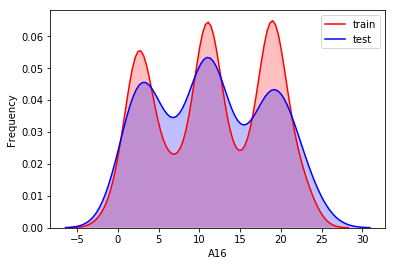

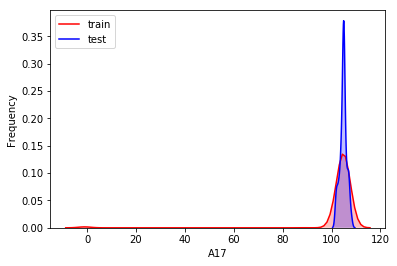

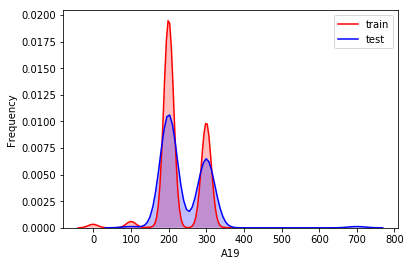

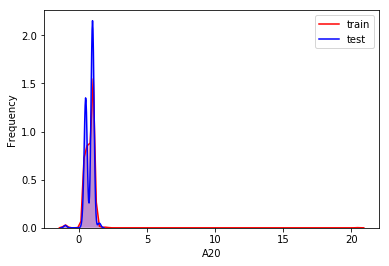

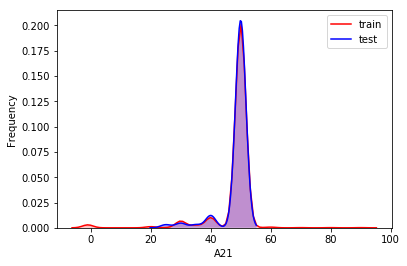

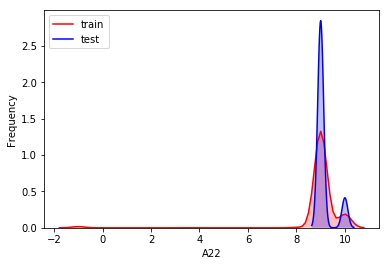

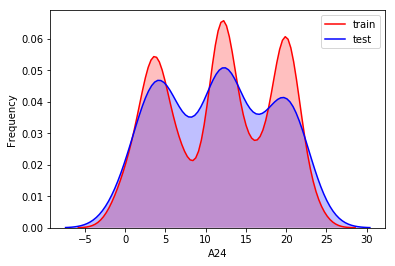

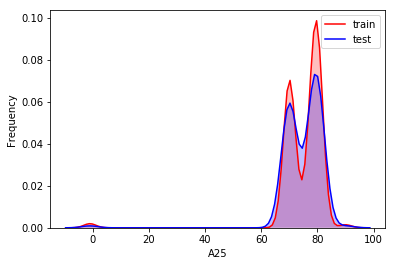

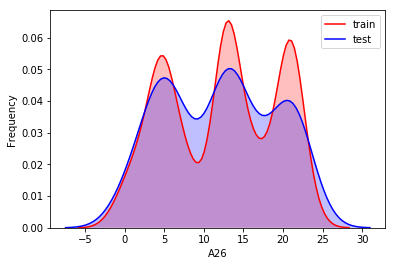

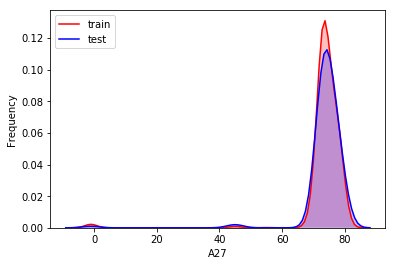

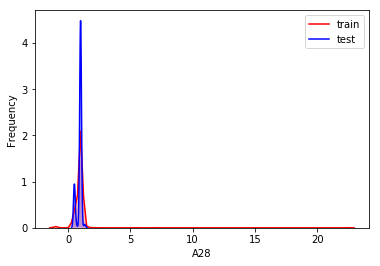

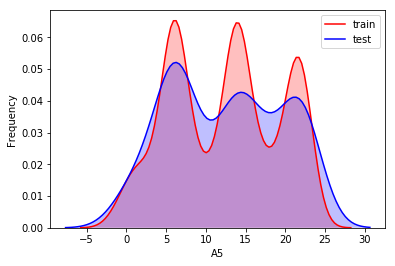

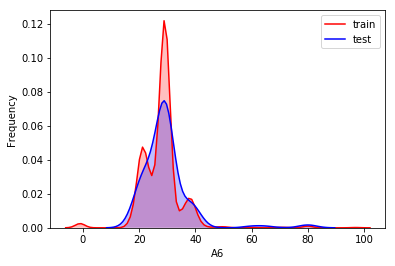

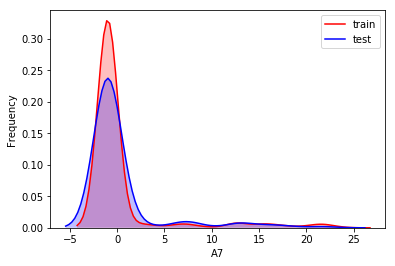

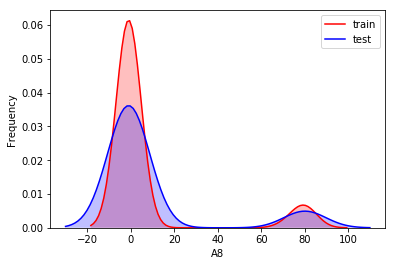

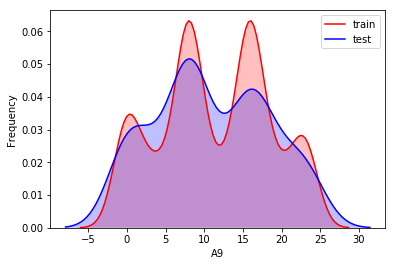

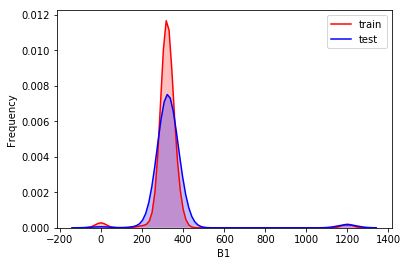

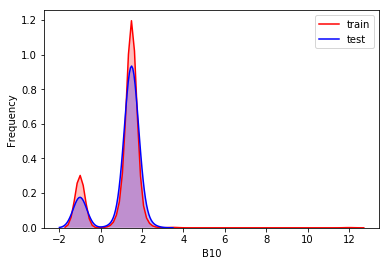

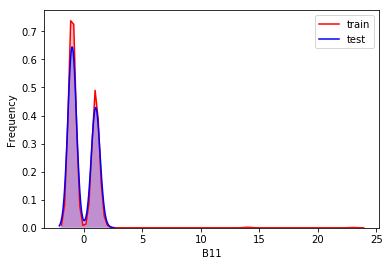

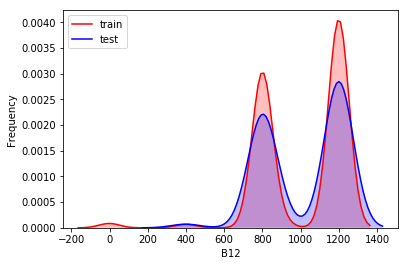

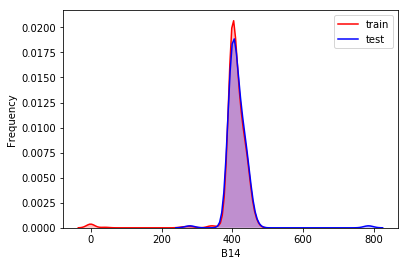

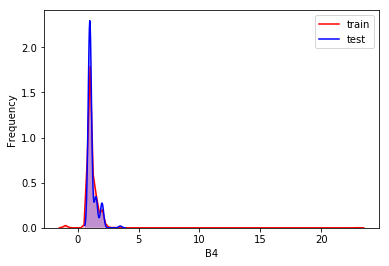

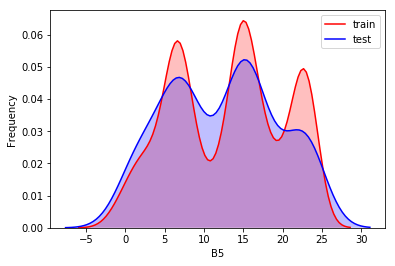

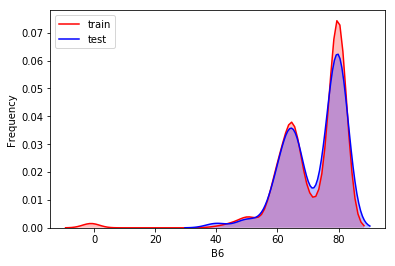

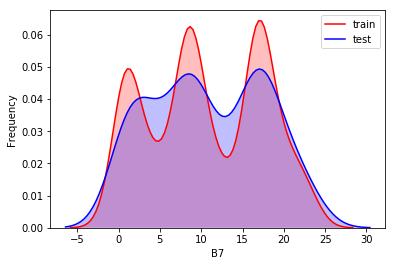

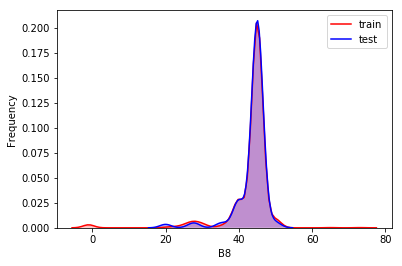

In [15]:
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][:1396], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][1396:], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

In [29]:
testb = pd.read_csv('../data/jinnan_round1_testA_20181227.csv',encoding = 'gb18030')

In [30]:
sub_df = testb[['样本id']]

In [31]:
sub_df

,样本id
0,sample_1656
1,sample_1548
2,sample_769
3,sample_1881
4,sample_1807
5,sample_145
6,sample_1212
7,sample_944
8,sample_829
9,sample_616


In [32]:
prediction = np.zeros(len(testb))

In [33]:
sub_df[1] = prediction

In [34]:
sub_df

,样本id,1
0,sample_1656,0.0
1,sample_1548,0.0
2,sample_769,0.0
3,sample_1881,0.0
4,sample_1807,0.0
5,sample_145,0.0
6,sample_1212,0.0
7,sample_944,0.0
8,sample_829,0.0
9,sample_616,0.0


In [35]:
sub_df.to_csv('../data/result.csv',encoding='utf-8',header=None,index=False)